# Motif Discord Self-Join #

Time series motifs are approximately repeated subsequences found within a longer time series

https://stumpy.readthedocs.io/en/latest/Tutorial_STUMPY_Basics.html

In [1]:
# SETUP
import numpy as np
import stumpy
import helper.testdata as testdata
import helper.visualize as visualize
import helper.results as results

### Steamgen Dataset ###

This data was generated using fuzzy models applied to mimic a steam generator at the Abbott Power Plant in Champaign, IL. The data feature that we are interested in is the output steam flow telemetry that has units of kg/s and the data is “sampled” every three seconds with a total of 9,600 datapoints.

half hour window: m = 640

In [3]:
# SETUP
use_case = "motifDiscordSelf"
data_name = "steamgen"

T = testdata.load_from_csv("../data/" + use_case + "/" + data_name + ".csv", column='steam flow')
print(T)

[ 9.3029701  9.6626206 10.990955  ...  7.8568536  7.799764   7.7678673]


### Experiments ###

In [4]:
# Hyperparams
target_w = 640
ds = [1,2,3,4,5,6,7,8]

In [4]:
# calculate
for d in ds:
    m = round((target_w-1)/d) + 1
    file_name =  data_name + "_d" + str(d) + "_m" + str(m)
    file_path = "../results/" + use_case + "/" + data_name + "/" + file_name

    if d == 1:
        mp = stumpy.stump(T, m=m)
    else:
        mp = stumpy.stump_dil(T, m=m, d=d)

    motif_idx = np.argsort(mp[:, 0])[0]
    motif_nearest_neighbor_idx = mp[motif_idx, 1]
    top_motif_pair_idxs = [motif_idx, motif_nearest_neighbor_idx]

    discord_idx = np.argsort(mp[:, 0])[-1]
    
    results.save([T, m, d, mp, top_motif_pair_idxs, discord_idx], file_path + ".npy")

/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/results.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(np_arrays)
/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `stump_dil(['T_A', 'm', 'T_B', 'ignore_trivial', 'k', 'd']) and function `aamp(['T_A', 'm', 'T_B', 'ignore_trivial', 'k']) have different arguments/parameters.
  warnings.warn(msg)
/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/results.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different l

[643, 8724] 3864
[8724, 643] 3863
[644, 8725] 3863
[643, 8724] 3865
[645, 8726] 3856
[8728, 647] 5730
[8725, 644] 5728
[648, 8729] 5734


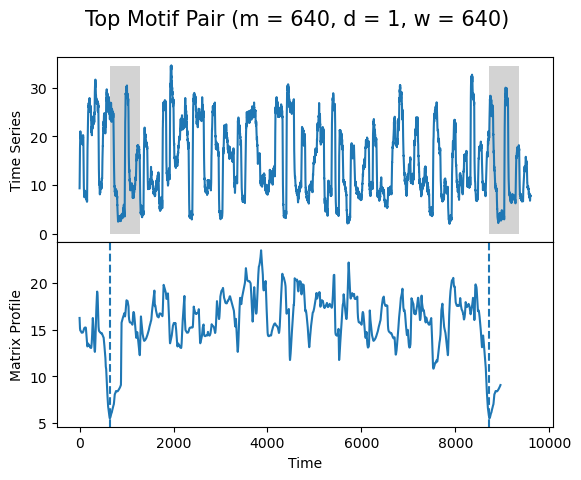

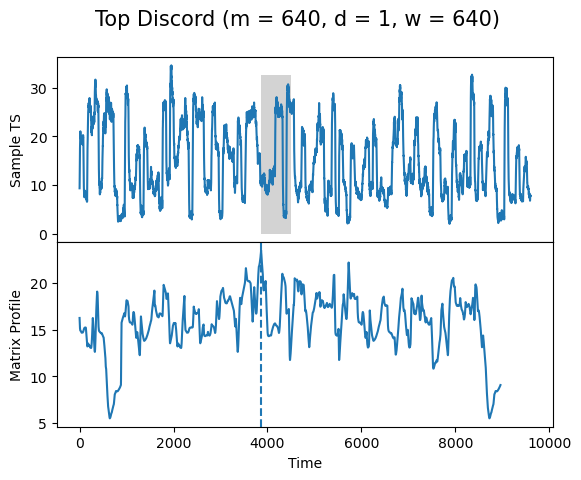

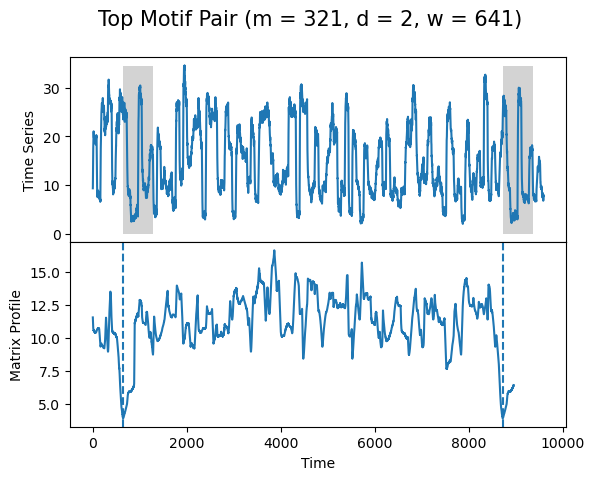

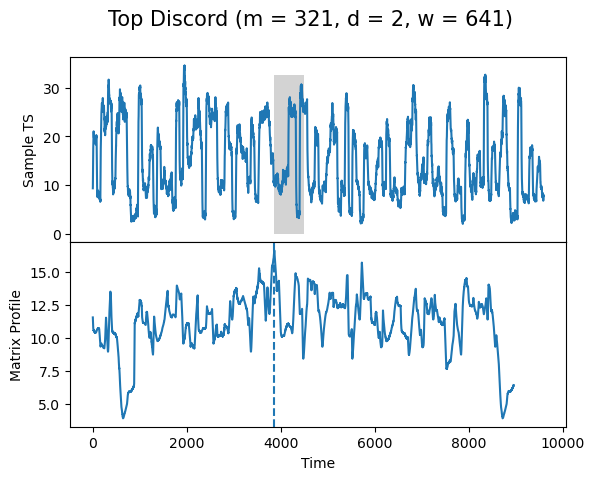

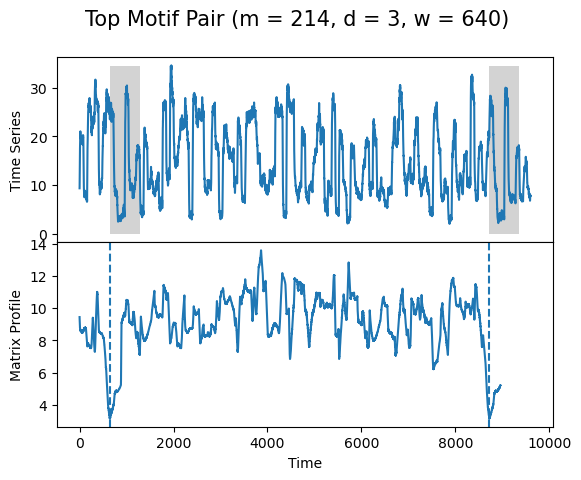

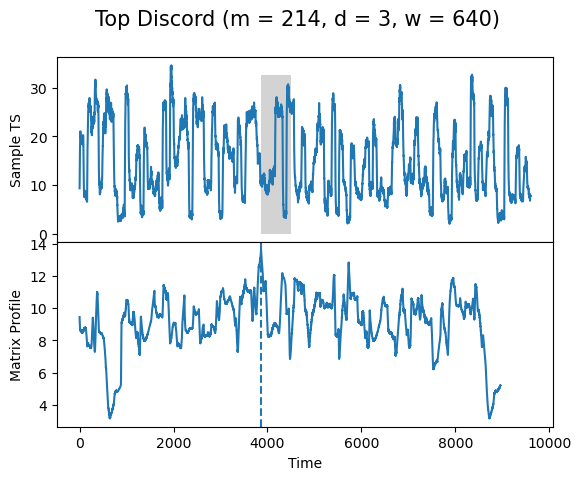

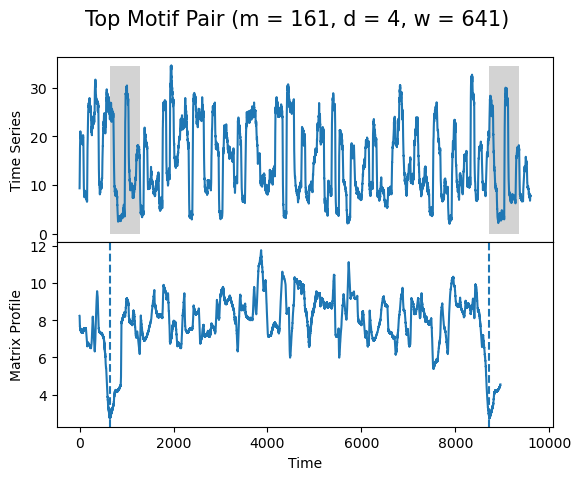

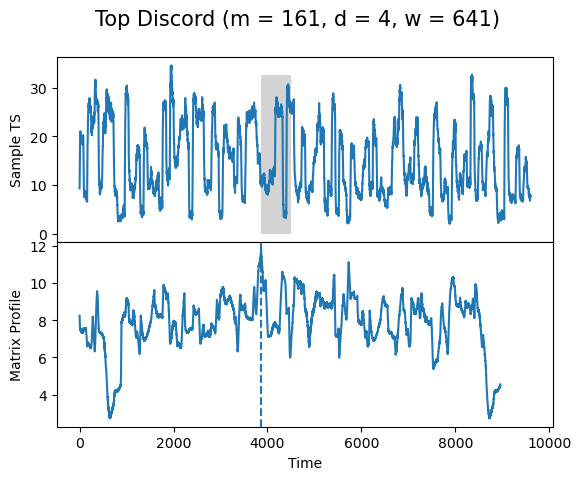

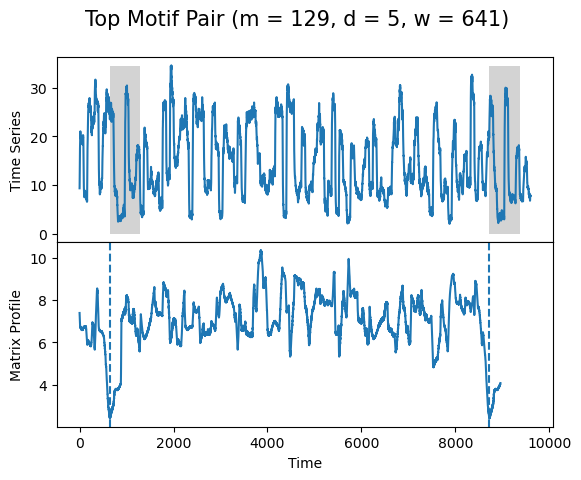

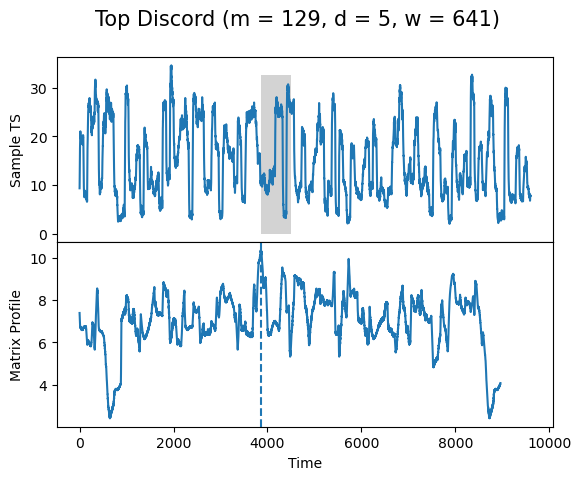

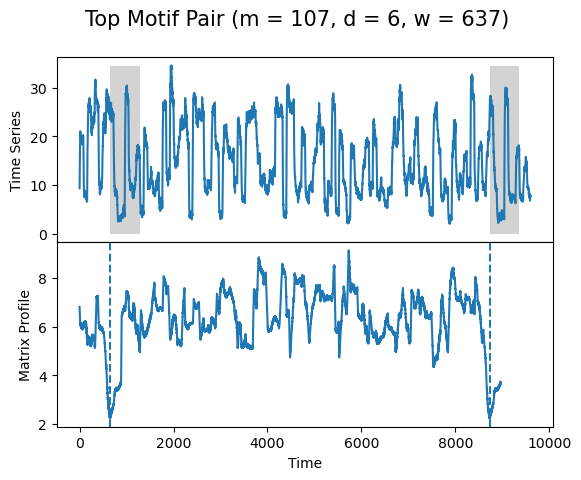

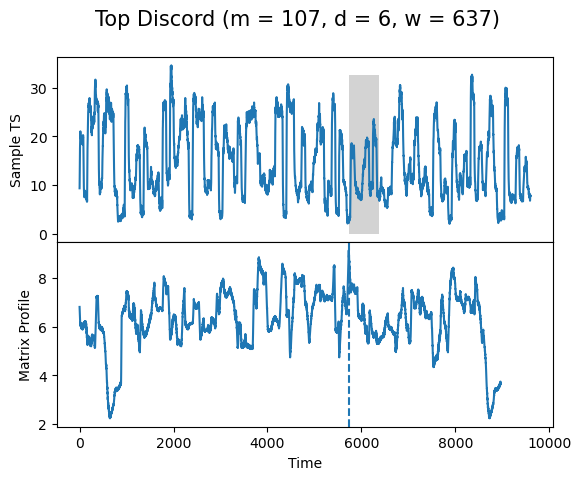

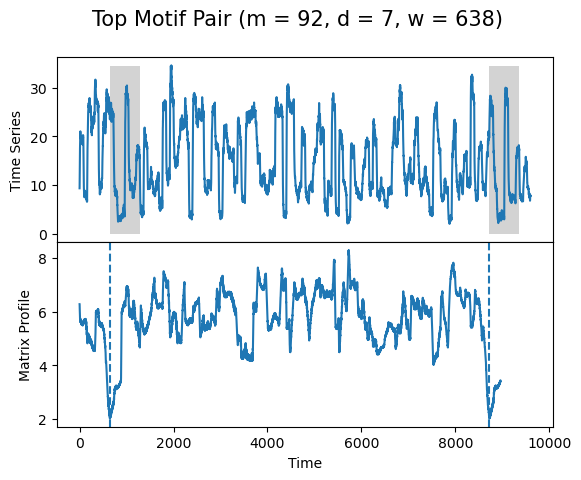

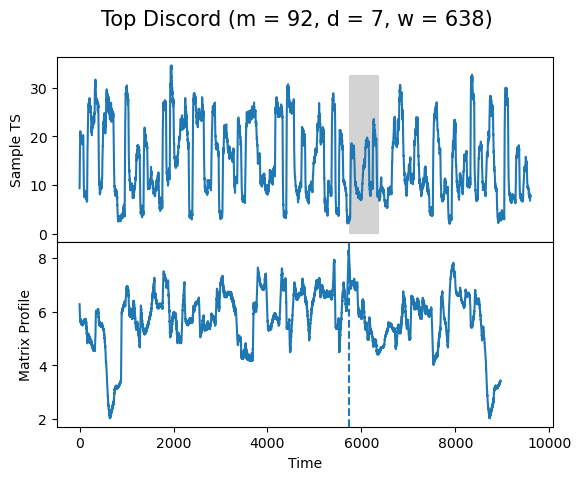

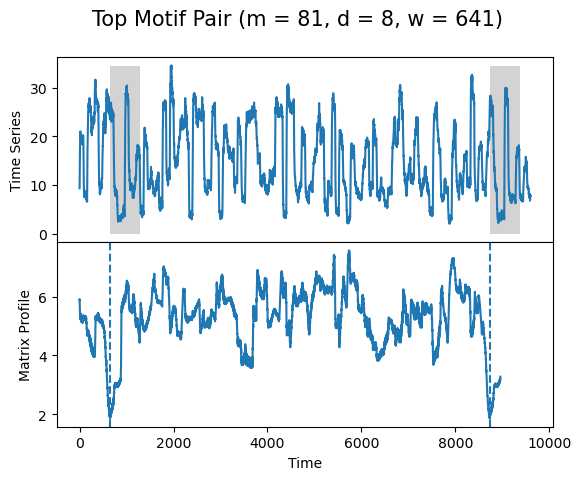

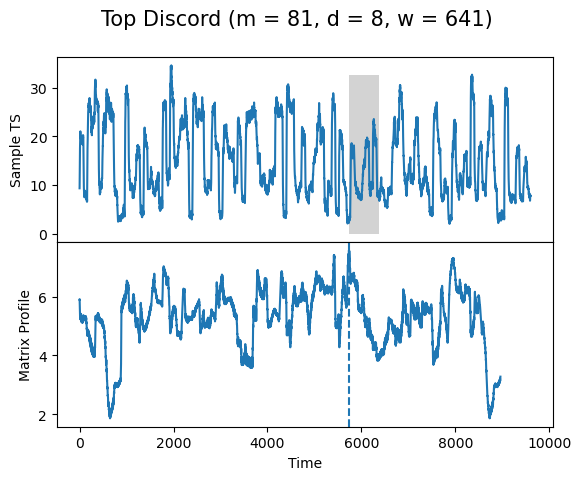

In [5]:
# visualize:
for d in ds:
    m = round((target_w-1)/d) + 1
    file_name = data_name + "_d" + str(d) + "_m" + str(m)
    file_path = "../results/" + use_case + "/" + data_name + "/" + file_name

    T, m, d, mp, top_motif_pair_idxs, discord_idx = results.load(file_path + ".npy")
    
    print(top_motif_pair_idxs, discord_idx)
    plot = visualize.motif_pair(T, m, d, mp, top_motif_pair_idxs)
    plot.savefig(file_path + "_motif_pair")
    plot = visualize.discord(T, m, d, mp, discord_idx)
    plot.savefig(file_path + "_discord")